In [32]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import os


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import models, layers,applications
# from keras import regularizers
from PIL import Image


import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## Read the data

In [222]:
df_train = pd.read_csv('Dataset/Train.csv')

## Basic EDA

In [223]:
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [7]:
df_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


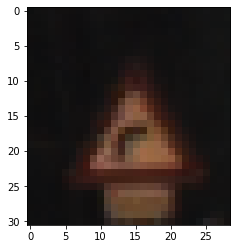

In [231]:
plt.imshow(plt.imread('Dataset/' + df_train['Path'][30]))
plt.show()

In [232]:
df_train.ClassId.value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
22     390
36     390
20     360
40     360
21     330
39     300
24     270
29     270
42     240
41     240
27     240
32     240
37     210
19     210
Name: ClassId, dtype: int64

In [225]:
classes_name = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' 
          }


In [226]:
df_train['ClassName'] = df_train.ClassId.map(classes_name)

In [233]:
df_train.ClassId.unique()

array([20,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [235]:
df_train.isna().sum()

Width        0
Height       0
Roi.X1       0
Roi.Y1       0
Roi.X2       0
Roi.Y2       0
ClassId      0
Path         0
ClassName    0
dtype: int64

In [228]:
df_train = df_train.dropna()

In [ ]:
df_train.corr()

In [ ]:
df_train.shape

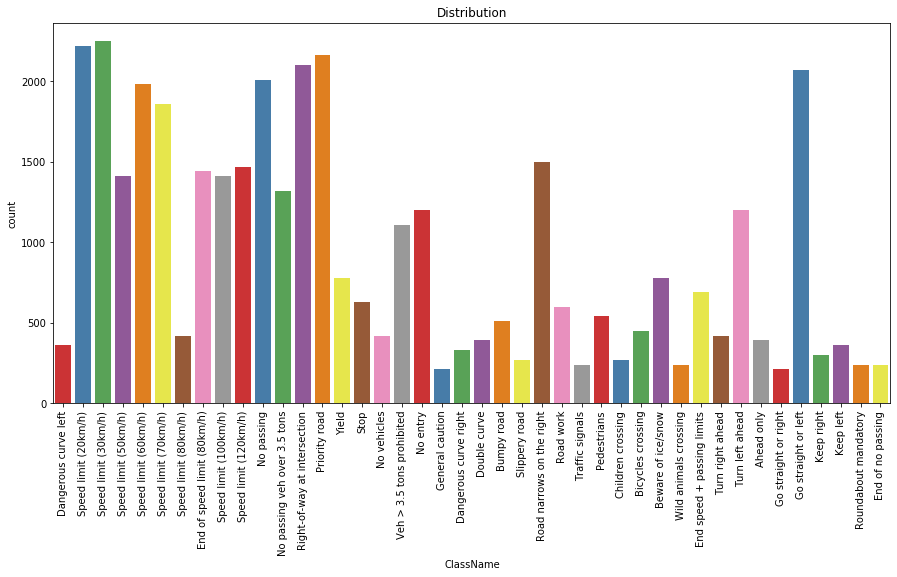

In [230]:

plt.figure(figsize=(15,7))
chart = sns.countplot(df_train['ClassName'], palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Distribution');

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df_train.ClassId, kde=False, bins=(90))

In [ ]:
df_train

## Preprocessing

#### Extract array with four parameter:

    1- Shape
    2- Width
    3- Hight
    4- Color

In [187]:
data = []
labels = []
cur_path = os.getcwd()



In [188]:
classes  =43
classes

43

In [189]:
for i in range(classes):
    path = os.path.join(cur_path, 'Dataset/train', str(i))
    images = os.listdir(path)
    print(images[i])
    for l in images:
        try:            
            image = Image.open(path + "//" + l)
            image = image.resize((128, 128))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except :
            print('Error loading image')
X = np.array(data)
y = np.array(labels)

00000_00005_00023.png
00001_00018_00015.png
00002_00047_00029.png
00003_00010_00005.png
00004_00046_00017.png
00005_00000_00020.png
00006_00013_00029.png
00007_00036_00009.png
00008_00030_00018.png
00009_00020_00011.png
00010_00013_00016.png
00011_00000_00003.png
00012_00034_00018.png
00013_00035_00022.png
00014_00008_00017.png
00015_00020_00008.png
00016_00006_00029.png
00017_00015_00001.png
00018_00034_00016.png
00019_00003_00026.png
00020_00002_00012.png
00021_00003_00002.png
00022_00009_00008.png
00023_00003_00020.png
00024_00003_00026.png
00025_00040_00009.png
00026_00017_00010.png
00027_00002_00029.png
00028_00004_00013.png
00029_00003_00004.png
00030_00006_00008.png
00031_00020_00008.png
00032_00000_00028.png
00033_00004_00026.png
00034_00009_00023.png
00035_00024_00024.png
00036_00002_00013.png
00037_00003_00005.png
00038_00038_00022.png
00039_00001_00024.png
00040_00011_00019.png
00041_00001_00015.png
00042_00005_00000.png


In [191]:
X.shape

(39209, 128, 128, 3)

In [192]:
y.shape

(39209,)

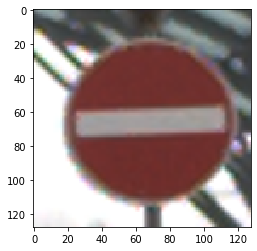

In [221]:
import random
i = random.randint(0 , len(X))
plt.imshow(X[i])

In [15]:
X.shape

(39209, 32, 32, 3)

In [ ]:
# def grayscale(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     return img
# def equalize(img):
#     img =cv2.equalizeHist(img)
#     return img
# def preprocessing(img):
#     img = grayscale(img)     # CONVERT TO GRAYSCALE
#     img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
#     img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
#     return img

# X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
# X_test=np.array(list(map(preprocessing,X_test)))
# plt.imshow(X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

In [ ]:
# X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
# X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [ ]:
X_train.shape

In [ ]:
# ############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
# dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
#                             height_shift_range=0.1,
#                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
#                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
#                             rotation_range=10)  # DEGREES

In [ ]:
# dataGen.fit(X_train)
# batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
# X_batch,y_batch = next(batches)

In [ ]:
# X_batch[i].reshape(imageDimesions[0],imageDimesions[1])

In [ ]:
# import cv2
# import random

In [ ]:
# def gray_scale(image):
    
#     return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [ ]:
# def grayscale(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     return img
# # def equalize(img):
# #     img =cv2.equalizeHist(img)
# #     return img
# def preprocessing(img):
#     img = grayscale(img)     # CONVERT TO GRAYSCALE
# #     img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
# #     img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
#     return img

In [ ]:
# X.shape

In [ ]:
# X_gray=np.array(list(map(preprocessing,X)))  # TO IRETATE AND PREPROCESS ALL IMAGES
# # X_test=np.array(list(map(preprocessing,X)))
# plt.imshow(X_gray[random.randint(0,len(X)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY


### Train test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [50]:
X.shape

(39209, 32, 32, 3)

In [51]:
X_train.shape

(31367, 32, 32, 3)

28


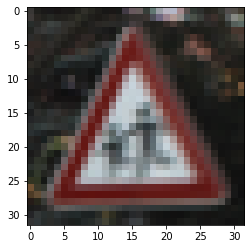

In [52]:
print(y_train[1])

plt.imshow(X_train[1])

### Modeling

#### Step1
Build the neural network

In [104]:
# Firest model
model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(64 * 9, activation='sigmoid'))
model.add(layers.Dense(64 * 9, activation='sigmoid'))
model.add(layers.Dense(classes, activation='softmax'))

model.build(input_shape=(None, 32, 32, 3))



In [105]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 576)               1770048   
_________________________________________________________________
dense_6 (Dense)              (None, 576)               332352    
_________________________________________________________________
dense_7 (Dense)              (None, 43)                24811     
Total params: 2,127,211
Trainable params: 2,127,211
Non-trainable params: 0
_________________________________________________________________


#### Step 2
Compile the model

In [106]:
model.compile('sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#### Step 3 
Fitting the model

In [107]:
X_train.shape

(31367, 32, 32, 3)

In [108]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, # num of iteration,
                    batch_size=None, # how many sample to update weight,
                    verbose=1) # to print log of epech or not

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 9s 302us/step - loss: 3.3717 - accuracy: 0.1331 - val_loss: 3.2372 - val_accuracy: 0.1154
Epoch 2/100
31367/31367 [==============================] - 9s 278us/step - loss: 2.9946 - accuracy: 0.2780 - val_loss: 2.7946 - val_accuracy: 0.2946
Epoch 3/100
31367/31367 [==============================] - 9s 278us/step - loss: 2.5845 - accuracy: 0.3654 - val_loss: 2.4652 - val_accuracy: 0.3583
Epoch 4/100
31367/31367 [==============================] - 9s 276us/step - loss: 2.3132 - accuracy: 0.4103 - val_loss: 2.1797 - val_accuracy: 0.4285
Epoch 5/100
31367/31367 [==============================] - 9s 281us/step - loss: 2.1478 - accuracy: 0.4438 - val_loss: 2.1214 - val_accuracy: 0.4666
Epoch 6/100
31367/31367 [==============================] - 9s 275us/step - loss: 2.0827 - accuracy: 0.4639 - val_loss: 2.0290 - val_accuracy: 0.4362
Epoch 7/100
31367/31367 [==============================] 

In [110]:
print('Train loss', history.history['loss'][-1])
print('Test loss', history.history['val_loss'][-1])

NameError: name 'history' is not defined

NameError: name 'history' is not defined

<Figure size 432x288 with 0 Axes>

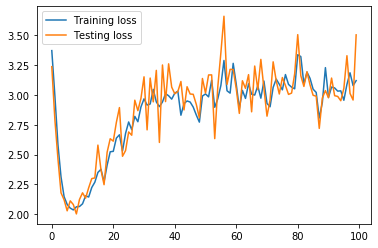

In [110]:
## plot loss function
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

#### Step1
Build the neural network

In [ ]:
len(np.unique(y_train))

In [ ]:
# n_classes = len(np.unique(y_train))

# model = models.Sequential()

# model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(n_classes, activation='softmax'))

# model.build(input_shape=(None, 30, 30, 3))

# model.compile('sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.summary()

In [ ]:
X_train[..., np.newaxis].shape[1:]

In [26]:

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(classes, activation='softmax'))





#### Step 2
Compile the model

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



#### Step 3 
Fitting the model

In [29]:
X_train.shape

(31367, 32, 32, 3)

In [30]:
X_test.shape

(7842, 32, 32, 3)

In [31]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, # num of iteration,
                    batch_size=None, # how many sample to update weight,
                    verbose=1) # to print log of epech or not


Train on 31367 samples, validate on 7842 samples
Epoch 1/100
 9632/31367 [========>.....................] - ETA: 2:15 - loss: 15.3631 - accuracy: 0.0443

KeyboardInterrupt: 

In [ ]:
loss_test, acc_test = model.evaluate(X_test, y_test)

print(f'Test accuracy: {acc_test:.3f}')
print(f'Test loss: {loss_test:.3f}')

In [ ]:
classes_name

## Modeling 

In [56]:
n_classes = len(np.unique(y_train))

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(n_classes, activation='softmax'))

model.build(input_shape=(None, 32, 32, 3))

model.compile('sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 43)                99115     
Total params: 137,835
Trainable params: 137,835
Non-trainable params: 0
________________________________________________

In [57]:
X_train.shape

(31367, 32, 32, 3)

In [58]:
model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Train on 25093 samples, validate on 6274 samples
Epoch 1/100
25093/25093 [==============================] - 23s 925us/step - loss: 3.1499 - accuracy: 0.1754 - val_loss: 2.6808 - val_accuracy: 0.2799
Epoch 2/100
25093/25093 [==============================] - 31s 1ms/step - loss: 2.1552 - accuracy: 0.3890 - val_loss: 1.9633 - val_accuracy: 0.3774
Epoch 3/100
25093/25093 [==============================] - 33s 1ms/step - loss: 1.7066 - accuracy: 0.5046 - val_loss: 1.6177 - val_accuracy: 0.4592
Epoch 4/100
25093/25093 [==============================] - 32s 1ms/step - loss: 1.3251 - accuracy: 0.6432 - val_loss: 1.4207 - val_accuracy: 0.5953
Epoch 5/100
25093/25093 [==============================] - 29s 1ms/step - loss: 0.9776 - accuracy: 0.7687 - val_loss: 0.9107 - val_accuracy: 0.7520
Epoch 6/100
25093/25093 [==============================] - 29s 1ms/step - loss: 0.7238 - accuracy: 0.8459 - val_loss: 0.6913 - val_accuracy: 0.8330
Epoch 7/100
25093/25093 [==============================] - 27

In [60]:
loss_test, acc_test = model.evaluate(X_test, y_test)

print(f'Test accuracy: {acc_test:.3f}')
print(f'Test loss: {loss_test:.3f}')

7842/7842 [==============================] - 2s 284us/step
Test accuracy: 0.991
Test loss: 0.047


In [143]:
from keras.models import load_model
import pickle
# STORE THE MODEL AS A PICKLE OBJECT
pickle_out= open("Models/capstone_model_wed.p","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()
# cv2.waitKey(0)

In [144]:
from keras.models import load_model

model.save('Models/capstone_model_wed.h5')  # creates a HDF5 file 
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('Models/capstone_model_wed.h5')

In [116]:
# ## plot loss function
# train_loss = model.history['loss']
# test_loss = model.history['val_loss']
# plt.plot(train_loss, label='Training loss')
# plt.plot(test_loss, label='Testing loss')
# plt.legend()

In [145]:
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

Predicted: No entry
Actual: No entry


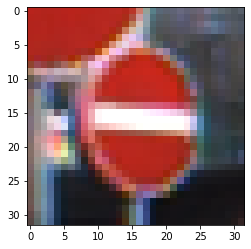

In [184]:
i = np.random.randint(0, len(X_train))
# print(i)
y_pred = model.predict(X_train[i].reshape(1, 32, 32, 3)).argmax()

print('Predicted:',getCalssName(y_pred))

print('Actual:',getCalssName(y_train[i]))
plt.imshow(X_train[i]);

## To do!
2- GUI for presentation demo X


3- Presentation. X




1- segmentation algorithms to get boxes  -- pretrined model


4- video framing X


5- camera demo 

In [ ]:
# Save model
model.save('Models/traffic_sign_classifier222')

In [ ]:
import cv2
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle



In [ ]:
df_train.head()

In [ ]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
import cv2 
  
# path 
path = 'Dataset/Train/20/00020_00000_00000.png'
  
# Using cv2.imread() method 
img = cv2.imread(path, 0) 
  
# Displaying the image 
plt.imshow( img) 



ax = plt.gca()

# Create a Rectangle patch
rect = Rectangle((5,5),17,15,linewidth=2,edgecolor='r', fill=False)

# Add the patch to the Axes
ax.add_patch(rect)



# GUI


In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import cv2
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('Models/capstone_model_wed.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',18,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='black',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='black',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

Instructions for updating:
Colocations handled automatically by placer.
End of speed limit (80km/h)
Go straight or left
Speed limit (60km/h)
Stop


KeyboardInterrupt: 

# Cam Demo

In [1]:
import numpy as np
import cv2
import pickle

In [2]:
#############################################

frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################

In [3]:
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# IMPORT THE TRANNIED MODEL
pickle_in=open("Models/cam_model_wed.p","rb")  ## rb = READ BYTE
model=pickle.load(pickle_in)

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [5]:
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [ ]:
while True:

    # READ IMAGE
    success, imgOrignal = cap.read()

    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break